In [18]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Reading the data from file into a pandas dataframe
df=pd.read_csv("student_scores.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Printing the first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


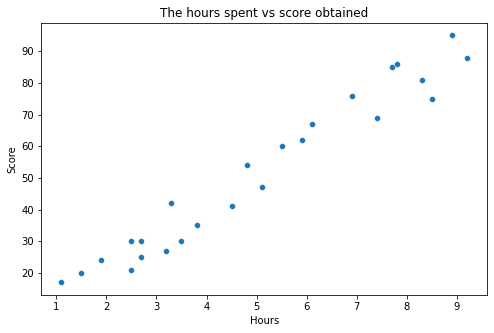

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.title("The hours spent vs score obtained") #title
plt.xlabel("Hours") #x label
plt.ylabel("Score") #y label
plt.show()

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
pred1=reg1.predict(X_test)

In [10]:
print(mean_absolute_error(y_test, pred1))
print(mean_squared_error(y_test, pred1,squared=False))
print(r2_score(y_test, pred1))

4.564015037730867
4.90659620962037
0.9435488190277577


In [11]:
reg2 = GradientBoostingRegressor(random_state=0)
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)

In [12]:
print(mean_absolute_error(y_test, pred2))
print(mean_squared_error(y_test, pred2,squared=False))
print(r2_score(y_test, pred2))

6.541765722395685
7.543372675748168
0.8665730611005341


In [13]:
reg3=LogisticRegression(random_state=0)
reg3.fit(X_train, y_train)
pred3=reg3.predict(X_test)

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
print(mean_absolute_error(y_test, pred3))
print(mean_squared_error(y_test, pred3,squared=False))
print(r2_score(y_test, pred3))

7.444444444444445
8.736894948054104
0.8210108846688282


In [19]:
reg4 = regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
reg4.fit(X_train, y_train)
pred4=reg4.predict(X_test)

In [20]:
print(mean_absolute_error(y_test, pred4))
print(mean_squared_error(y_test, pred4,squared=False))
print(r2_score(y_test, pred4))

6.555120256212023
7.5632097480991165
0.8658703833605529
